This function maps the S&P 500 to the price of UPRO.


$$\mathrm{UPRO}=2.961636082259724\cdot\mathrm{SPX}+0.00014390300083251257$$

It is based on the daily closing prices of UPRO and the S&P 500 from the date of inception of UPRO through December 27, 2018.  Data is taken from TD Ameritrade and Yahoo.  The two sources disagree on several daily closing prices.  However, the functions given by linear regression are similar.

In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

params = (
    ('apikey', 'REDACTION@AMER.OAUTHAP'),
    ('periodType', 'month'),
    ('period', '1'),
    ('frequencyType', 'daily'),
    ('startDate', '1245902400000'),
)

response = requests.get('https://api.tdameritrade.com/v1/marketdata/UPRO/pricehistory', params=params)
UPROdf = pd.DataFrame.from_dict(response.json()['candles'])
UPROdf.datetime = (UPROdf.datetime / 1000.0).apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
UPROdf.drop(['high', 'low', 'open', 'volume'], axis=1, inplace=True)
UPROdf.rename(columns={'close':'closeAmeritrade', 'datetime':'date'}, inplace=True)
UPROdf['pctChangeAmeritrade'] = UPROdf.closeAmeritrade.pct_change()
UPROdfYahoo = pd.read_csv("/home/matt/Downloads/UPRO (1).csv")
UPROdf['closeYahoo'] = UPROdfYahoo.Close
UPROdf['pctChangeYahoo'] = UPROdf.closeYahoo.pct_change()
UPROdf['pctDeviation'] = (UPROdf.closeAmeritrade - UPROdf.closeYahoo) / UPROdf.closeAmeritrade
UPROdf = UPROdf[['date', 'closeAmeritrade', 'closeYahoo', 'pctChangeAmeritrade', 'pctChangeYahoo', 'pctDeviation']]
UPROdf.head()

,date,closeAmeritrade,closeYahoo,pctChangeAmeritrade,pctChangeYahoo,pctDeviation
0,2009-06-25,2.411111,2.411111,NaN,NaN,0.000000e+00
1,2009-06-26,2.398611,2.398611,-0.005184,-0.005184,-1.851443e-16
2,2009-06-29,2.466667,2.466667,0.028373,0.028373,1.800361e-16
3,2009-06-30,2.407778,2.407778,-0.023874,-0.023874,0.000000e+00
4,2009-07-01,2.433611,2.433611,0.010729,0.010729,0.000000e+00


In [2]:
UPROdf.tail()

,date,closeAmeritrade,closeYahoo,pctChangeAmeritrade,pctChangeYahoo,pctDeviation
2389,2018-12-20,33.59,33.590000,-0.048981,-0.048981,0.000000e+00
2390,2018-12-21,31.48,31.480000,-0.062816,-0.062816,0.000000e+00
2391,2018-12-24,29.00,29.000000,-0.078780,-0.078780,0.000000e+00
2392,2018-12-26,33.15,33.150002,0.143103,0.143104,-6.033183e-08
2393,2018-12-27,34.03,34.029999,0.026546,0.026546,2.938584e-08


The following summarizes the dates on which the closing prices for UPRO reported by TD Ameritrade and Yahoo differ.

In [3]:
UPROdf.loc[UPROdf.closeAmeritrade.round(2) != UPROdf.closeYahoo.round(2)].pctDeviation.describe()

count    2.700000e+01
mean     3.917327e-04
std      1.297089e-03
min     -2.043829e-03
25%     -5.830443e-08
50%      5.236973e-08
75%      7.687328e-04
max      4.471058e-03
Name: pctDeviation, dtype: float64

In [4]:
params = (
    ('apikey', 'REDACTION@AMER.OAUTHAP'),
    ('periodType', 'month'),
    ('period', '1'),
    ('frequencyType', 'daily'),
    ('startDate', '-404856000000'),
)

response = requests.get('https://api.tdameritrade.com/v1/marketdata/SPX/pricehistory', params=params)
SPXdf = pd.DataFrame.from_dict(response.json()['candles'])
SPXdf.datetime = (SPXdf.datetime / 1000.0).apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
SPXdf.drop(['high', 'low', 'open', 'volume'], axis=1, inplace=True)
SPXdf.rename(columns={'close':'closeAmeritrade', 'datetime':'date'}, inplace=True)
SPXdf['pctChangeAmeritrade'] = SPXdf.closeAmeritrade.pct_change()
SPXdfYahoo = pd.read_csv("/home/matt/Downloads/^GSPC (2).csv")
SPXdf['closeYahoo'] = SPXdfYahoo.Close
SPXdf['pctChangeYahoo'] = SPXdf.closeYahoo.pct_change()
SPXdf['pctDeviation'] = (SPXdf.closeAmeritrade - SPXdf.closeYahoo) / SPXdf.closeAmeritrade
SPXdf = SPXdf[['date', 'closeAmeritrade', 'closeYahoo', 'pctChangeAmeritrade', 'pctChangeYahoo', 'pctDeviation']]
SPXdf.head()

,date,closeAmeritrade,closeYahoo,pctChangeAmeritrade,pctChangeYahoo,pctDeviation
0,1987-04-03,300.41000,300.410004,NaN,NaN,-1.331514e-08
1,1987-04-06,301.95001,301.950012,0.005126,0.005126,-6.623613e-09
2,1987-04-07,296.69000,296.690002,-0.017420,-0.017420,-6.741043e-09
3,1987-04-08,297.26001,297.260010,0.001921,0.001921,0.000000e+00
4,1987-04-09,292.85999,292.859985,-0.014802,-0.014802,1.707300e-08


In [5]:
SPXdf.tail()

,date,closeAmeritrade,closeYahoo,pctChangeAmeritrade,pctChangeYahoo,pctDeviation
7994,2018-12-20,2467.42,2467.419922,-0.015772,-0.015772,3.161197e-08
7995,2018-12-21,2416.62,2416.620117,-0.020588,-0.020588,-4.841473e-08
7996,2018-12-24,2351.10,2351.100098,-0.027112,-0.027112,-4.168262e-08
7997,2018-12-26,2467.70,2467.699951,0.049594,0.049594,1.985655e-08
7998,2018-12-27,2488.83,2488.830078,0.008563,0.008563,-3.134003e-08


The following summarizes the dates on which the closing prices for SPX reported by TD Ameritrade and Yahoo differ.

In [6]:
SPXdf.loc[SPXdf.closeAmeritrade.round(2) != SPXdf.closeYahoo.round(2)].pctDeviation.describe()

count    296.000000
mean      -0.000031
std        0.000303
min       -0.004481
25%       -0.000025
50%       -0.000009
75%        0.000018
max        0.000685
Name: pctDeviation, dtype: float64

Data from TD Ameritrade
coefficient = 2.9615538789741382
intercept = 0.0001438892750095398
R^2 = 0.9942690682103693


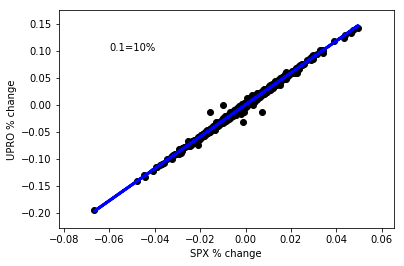

In [7]:
X = SPXdf.pctChangeAmeritrade.iloc[SPXdf.loc[SPXdf.date == '2009-06-26'].index.values.astype(int)[0]:].values.reshape(-1, 1)
y = UPROdf.pctChangeAmeritrade.iloc[1:].values
model = linear_model.LinearRegression().fit(X, y)
plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X), color='blue', linewidth=3)
plt.xlabel("SPX % change")
plt.ylabel("UPRO % change")
plt.text(-.06, .1, '0.1=10%')
print ("Data from TD Ameritrade\ncoefficient = " + str(model.coef_[0]) + "\nintercept = " + str(model.intercept_) + "\nR^2 = " + str(model.score(X, y)))
plt.show()

Data from Yahoo
coefficient = 2.961636082259724
intercept = 0.00014390300083251257
R^2 = 0.9942373152330283


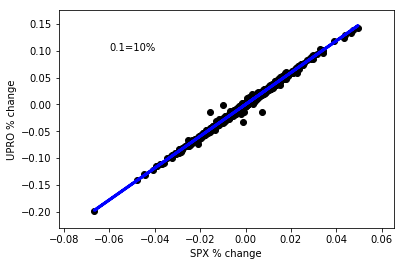

In [8]:
X = SPXdf.pctChangeYahoo.iloc[SPXdf.loc[SPXdf.date == '2009-06-26'].index.values.astype(int)[0]:].values.reshape(-1, 1)
y = UPROdf.pctChangeYahoo.iloc[1:].values
model = linear_model.LinearRegression().fit(X, y)
plt.scatter(X, y, color='black')
plt.plot(X, model.predict(X), color='blue', linewidth=3)
plt.xlabel("SPX % change")
plt.ylabel("UPRO % change")
plt.text(-.06, .1, '0.1=10%')
print ("Data from Yahoo\ncoefficient = " + str(model.coef_[0]) + "\nintercept = " + str(model.intercept_) + "\nR^2 = " + str(model.score(X, y)))
plt.show()

We will use the function obtained from the Yahoo data because Yahoo provides data earlier than March 4, 1957. 